In [1]:
notebook_header = 'm1'

In [23]:
import numpy as np 
import glob
import os
from matplotlib import pyplot as plt
import imageio
import cv2
from pathlib import Path
from tqdm import tqdm 

# m1_preprocessing 

In [3]:
# Getting numpy files 

datasetLocation = './dataset/100422_70_home'
npyFiles = glob.glob(f"{datasetLocation}/*")

In [4]:
sample_rate = 40e6 # Hz.  This is the “Fs” we always talk about
center_freq = 433e6 # Hz.  Aka Carrier Frequency
num_samps = 160000 # samples returned per call to rx()
noiseMultiplier = 200

## Testing on 1 file 

- Validating samples 
- Testing Noise Imputation

In [5]:
# Tying on 1 file 
npyFile = npyFiles[102]

with open(npyFile, 'rb') as f:
    samples = np.load(f)
    
print(f'Sample Shape = {samples.shape}')

Sample Shape = (160000,)


Text(0.5, 1.0, 'Clean Sample')

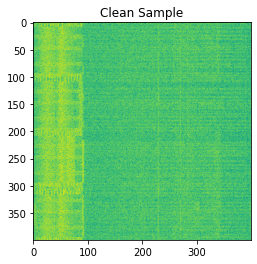

In [6]:
# Clear
y1_ = samples.reshape((400,400))
N = y1_.shape[1]
f = np.arange(sample_rate/-2, sample_rate/2, sample_rate/num_samps)
calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)
plt.imshow(calculated_FFT,interpolation=None)
plt.title('Clean Sample')

Noise Shape = (160000,)


Text(0.5, 1.0, 'Noisy Sample x1')

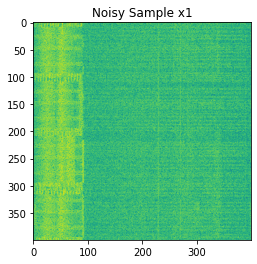

In [7]:
sampleLen = len(samples)
noise = (np.random.randn(sampleLen) + 1j*np.random.randn(sampleLen))/np.sqrt(2)
print(f'Noise Shape = {noise.shape}')
noisySamples = np.add(noise , samples)

y1_ = noisySamples.reshape((400,400))
N = y1_.shape[1]
f = np.arange(sample_rate/-2, sample_rate/2, sample_rate/num_samps)
calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)
plt.imshow(calculated_FFT,interpolation=None)
plt.title('Noisy Sample x1')

Noise Shape = (160000,)


Text(0.5, 1.0, 'Noisy Sample x2')

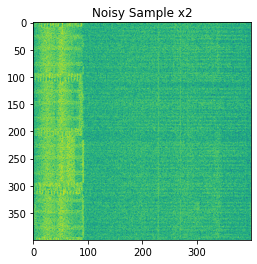

In [8]:
sampleLen = len(samples)
noise = (np.random.randn(sampleLen) + 1j*np.random.randn(sampleLen))/np.sqrt(2)
print(f'Noise Shape = {noise.shape}')
noisySamples = np.add(noise , samples)
noisySamples = np.add(noise,noisySamples)

y1_ = noisySamples.reshape((400,400))
N = y1_.shape[1]
f = np.arange(sample_rate/-2, sample_rate/2, sample_rate/num_samps)
calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)
plt.imshow(calculated_FFT,interpolation=None)
plt.title('Noisy Sample x2')

Noise Shape = (160000,)


Text(0.5, 1.0, 'Noisy Sample x200')

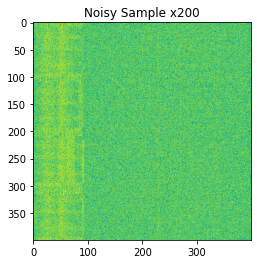

In [9]:
sampleLen = len(samples)
noise = (np.random.randn(sampleLen) + 1j*np.random.randn(sampleLen))/np.sqrt(2)
print(f'Noise Shape = {noise.shape}')
noisySamples = np.add(noise*noiseMultiplier , samples)


y1_ = noisySamples.reshape((400,400))
N = y1_.shape[1]
f = np.arange(sample_rate/-2, sample_rate/2, sample_rate/num_samps)
calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)
plt.imshow(calculated_FFT,interpolation=None)
plt.title(f'Noisy Sample x{noiseMultiplier}')

## Creating Training Dataset  

In [10]:
try:
    os.mkdir(f'./dataset/ML_{notebook_header}')
except FileExistsError:
    print('Output Location Exists, Please check if it is empty')

Output Location Exists, Please check if it is empty


In [11]:
try:
    os.mkdir(f'./dataset/ML_{notebook_header}/clean')
except FileExistsError:
    print('Clean Location Exists, Please check if it is empty')

Clean Location Exists, Please check if it is empty


In [12]:
try:
    os.mkdir(f'./dataset/ML_{notebook_header}/noisy')
except FileExistsError:
    print('Noisy Location Exists, Please check if it is empty')

Noisy Location Exists, Please check if it is empty


In [22]:
for npyFile in npyFiles: 
    samples = -1 
    PathVar = Path(npyFile)
    try:
        with open(npyFile, 'rb') as f:
            samples = np.load(f)
    except Exception :
        print('problem loading sample')
        break
        
    y1_ = samples.reshape((400,400))
    calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)    
    clean = calculated_FFT.astype(np.uint8)
    
    imageio.imwrite(f'./dataset/ML_{notebook_header}/clean/{PathVar.stem}.png', clean)
    
    
    
    sampleLen = len(samples)
    noise = (np.random.randn(sampleLen) + 1j*np.random.randn(sampleLen))/np.sqrt(2)
    noisySamples = np.add(noise*noiseMultiplier , samples)
    y1_ = noisySamples.reshape((400,400))
    calculated_FFT = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y1_)))**2)    
    noisy = calculated_FFT.astype(np.uint8)
    
    imageio.imwrite(f'./dataset/ML_{notebook_header}/noisy/{PathVar.stem}.png', noisy)